In [14]:
%run ./FIR_Helper_Methods.ipynb
helper_method = helper_methods()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>

# Review the transformed dataset (input features and label data)

once the data has been transformed and the transformed data is saved we can now train a model

We will read the transformed data frame and the data_summary which contains details of the transform and information on which features to use to train the model.


In [2]:
pickle_path = "/Users/aideenf/Documents/GitHub/Thesis_Aideen/Main/Data/transformed_data.csv_summary.pickle"
data_frame_path = "/Users/aideenf/Documents/GitHub/Thesis_Aideen/Main/Data/transformed_data.csv"

# Reload the file
data_frame, data_summary = helper_method.reload_data (pickle_path, 
                                                      data_frame_path, 
                                                      print_report = True)
# Reload the file

Number of samples in dataset:  21791
Output to predict:  first_pf
Output is continuous:  False
Output is binary:  True
Num of unique outputs:  2
Min output:  0
Max output:  1
High output range is positive?  True

Protected input features ['race', 'sex']
Other input features ['LSAT', 'UGPA', 'sander_index', 'region_first_FW', 'region_first_GL', 'region_first_MS', 'region_first_MW', 'region_first_Mt', 'region_first_NE', 'region_first_NG', 'region_first_NW', 'region_first_PO', 'region_first_SC', 'region_first_SE']

Summary of Data transformation per input feature:
************
race


************
sex


************
region_first



Input Features identified as possible proxies to protected Features:  []

Input Features identified as possibly output from another ML Model:  []


The X and y Values to be used in Model Train/Test/Validate


,race,sex,LSAT,UGPA,sander_index,region_first_FW,region_first_GL,region_first_MS,region_first_MW,region_first_Mt,region_first_NE,region_first_NG,region_first_NW,region_first_PO,region_first_SC,region_first_SE,first_pf
0,1,0,0.756757,0.738095,0.645287,0,1,0,0,0,0,0,0,0,0,0,1
1,1,0,0.675676,0.714286,0.568513,0,1,0,0,0,0,0,0,0,0,0,1
2,1,1,0.513514,0.738095,0.461613,0,0,1,0,0,0,0,0,0,0,0,1
3,0,1,0.756757,0.523810,0.505345,0,0,0,0,0,1,0,0,0,0,0,1
4,1,0,0.702703,0.809524,0.651118,0,1,0,0,0,0,0,0,0,0,0,1





All versions of all columns to be used for analysis of Test/Validate


# Review the training/test data to set positive and negative(Binary) output ranges for Logistic Regression.

Select the decision boundary between a positive and negative outcome of a continuous target variable, for the purpose of logistic regression.

In [3]:
helper_method.view_protected(data_summary.protected_x, 
                             data_summary.y_value, 
                             data_frame, _w=600, _h=600, 
                             y_high_positive = data_summary.HIGH_RANGE_POSITIVE,
                             persist_impact_col = True,
                             output_type_binary = data_summary.Y_BINARY)


Output()

In [4]:
display (data_frame.head())

,LSAT,UGPA,region_first_oh_benc,sander_index,region_first_FW,region_first_GL,region_first_MS,region_first_MW,region_first_Mt,region_first_NE,...,region_first_PO,region_first_SC,region_first_SE,race,sex,race_bm,race_benc,sex_benc,first_pf,Transformed_first_pf
0,0.756757,0.738095,GL,0.645287,0,1,0,0,0,0,...,0,0,0,1,0,White,White,1,1,1
1,0.675676,0.714286,GL,0.568513,0,1,0,0,0,0,...,0,0,0,1,0,White,White,1,1,1
2,0.513514,0.738095,MS,0.461613,0,0,1,0,0,0,...,0,0,0,1,1,White,White,2,1,1
3,0.756757,0.523810,NE,0.505345,0,0,0,0,0,1,...,0,0,0,0,1,Hispanic,Non_White,2,1,1
4,0.702703,0.809524,GL,0.651118,0,1,0,0,0,0,...,0,0,0,1,0,White,White,1,1,1


# Prepare transformed data for model training
- using the data summary as input the y value and appropriate X values will be returned
- Specify here if wany to imclude the protected data in the training or not. include_protected = True or False
- Right now we can only specify to include all protected, or none(True/False). If you only want to include some protected input features use include_protected = True, then drop the columns from the returned 'X' AND also drop the column from array data_summary.protected_column_list

In [5]:
use_transformed = True
if use_transformed == True:
    data_summary.y_value = "Transformed_" + data_summary.y_value

'''library Helper method
input the data_frame, the data_summary generated from reviewing the data or set independently.
'''
X, y, feature_columns = helper_method.get_train_test_split_data(data_frame, 
                                                                data_summary, 
                                                                include_protected = True
                                                               )
'''************'''


'************'

#  Create train/test split + SkLearn Logistic Regression+Return probability score. 
once we have created the model we have the logistic regression prediction probability, so that each individual I has a probability pᵢ to fall into category A, and q = 1-p to fall into category B

 Less formally, it can be thought of as a model for the set of possible outcomes of any single data row that asks a yes–no question. Such questions lead to outcomes that are boolean-valued: a single bit whose value is success/yes/true/one with probability p and failure/no/false/zero with probability q = 1 -p. All successful outcomes may then be ranked by probability score inorder to obtain an ordered list.
 
 Logistic regression is a machine learning model that uses a logistic function to model a binary dependent variable. Although there are better models in terms of performance (a.o. boosting methods, random forest, deep neural networks), logistic regression provides coefficients which are very easy to interpret. As this is an important feature for demonstration purposes, logistic regression is used here.



[LibLinear]Train Accuracy score:  0.8944469940339606
              precision    recall  f1-score   support

           0       0.64      0.14      0.23      1961
           1       0.90      0.99      0.94     15471

    accuracy                           0.89     17432
   macro avg       0.77      0.57      0.59     17432
weighted avg       0.87      0.89      0.86     17432


Test Accuracy score:  0.8969947235604496
              precision    recall  f1-score   support

           0       0.59      0.14      0.23       470
           1       0.90      0.99      0.94      3889

    accuracy                           0.90      4359
   macro avg       0.75      0.56      0.59      4359
weighted avg       0.87      0.90      0.87      4359



'*****EVALUATING MODEL WITH TRAINING DATA:***'

' Root mean squared error: 0.027829865312157708'

' R2 score: 0.7212534125978669'

'*****EVALUATING MODEL WITH TEST DATA:******'

' Root mean squared error: 0.02810387636691472'

' R2 score: 0.7078511620410766'

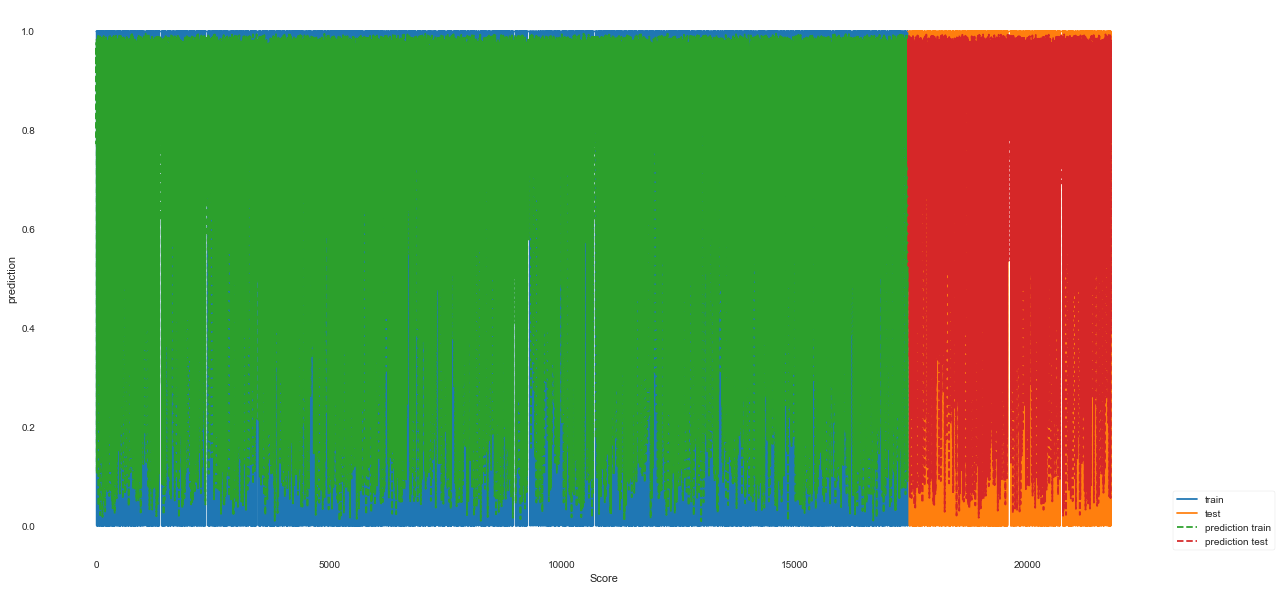

In [6]:
#from sklearn.linear_model import LogisticRegressionCV
# clf = LogisticRegressionCV(cv=5, solver = "liblinear", random_state=0, max_iter = 5000).fit(X_train, y_train)
# """
# Set up the logistic regression model
# """
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0, 
                                                    test_size = 0.20)

logistic_reg_model = LogisticRegression(solver = "liblinear", verbose = 1, random_state=0, max_iter = 1000).fit(X_train[feature_columns], y_train)
print ("Train Accuracy score: ", logistic_reg_model.score(X_train[feature_columns], y_train))
logistic_reg_y_train_pred = logistic_reg_model.predict(X_train[feature_columns])
logistic_reg_y_train_pred_prob = logistic_reg_model.predict_proba(X_train[feature_columns])
print(classification_report(y_train, logistic_reg_y_train_pred))
print ("")
print ("Test Accuracy score: ", logistic_reg_model.score(X_test[feature_columns], y_test))
logistic_reg_y_test_pred = logistic_reg_model.predict(X_test[feature_columns])
logistic_reg_y_test_pred_prob = logistic_reg_model.predict_proba(X_test[feature_columns])
print(classification_report(y_test, logistic_reg_y_test_pred))


def get_probability_y_actual(y_actual, y_prob):
    y_actual_prob = []
    y_prob_1 = []
    for y_a, y_p, i in zip(y_actual, y_prob, range(len(y_actual))):
        if y_a == 0:
            y_actual_prob.append(y_prob[i][0])
            y_prob_1.append(y_prob[i][1])
        else:
            y_actual_prob.append(y_prob[i][1])
            y_prob_1.append(y_prob[i][1])
    return y_actual_prob, y_prob_1


y_train_pred_prob, y_train_pred_prob_1 = get_probability_y_actual(y_train, logistic_reg_y_train_pred_prob)
y_test_pred_prob, y_test_pred_prob_1 = get_probability_y_actual(y_test, logistic_reg_y_test_pred_prob)


helper_method.visualise_RMSE_model_eval(y_train, y_test, y_train_pred_prob, y_test_pred_prob)

# Analise with Aequitas

https://towardsdatascience.com/a-tutorial-on-fairness-in-machine-learning-3ff8ba1040cb
https://arxiv.org/pdf/1908.00176.pdf
https://5harad.com/papers/fair-ml.pdf


In [7]:
# print (data_summary.renamed)
# print (data_summary.referenceNames)
# print(data_summary.encoding_dict)

#Retrieve only the protected attributes
focus_on_cols = helper_method.get_protected(data_summary)

'''For additional granularity retrieve all versions of the protected attributes
(before encoding and before values merged)'''
# focus_on_cols_benc = helper_method.get_protected_before_transform(data_summary)


# data_summary.non_protected_x
# data_summary.y_value

helper_method.view_aequitas_fairness_metrics(data_summary.y_value ,
                                       focus_on_cols,
                                       X_train, 
                                       y_train, 
                                       logistic_reg_y_train_pred,
                                       _w=600, _h=600, 
                                       y_high_positive = True,
                                        )

model_id, score_thresholds 1 {'rank_abs': [16993]}


# Shap interpretability
https://shap.readthedocs.io/en/latest/#
https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a
https://github.com/Rakeshsuku/Medium-Blog/blob/master/Kernel_SHAP.ipynb
https://github.com/slundberg/shap/blob/master/README.md


In [15]:
explainer, shap_values, x = helper_method.prepare_to_shap(X_train[feature_columns], 500, save_to_path = './')


length of SHAP values: 500
Shape of each element: (16,)
Shap_values saved to ./shap_values.pickle
Shap_explainer saved to ./shap_explainer.pickle
Shap_explainer saved to ./shap_x.pickle


In [16]:
shap_path = "/Users/aideenf/Documents/GitHub/Thesis_Aideen/Main"
# Reload the file
shap_values, explainer, x =  helper_method.reload_shap_data (shap_path)
# Reload the file

display (x.head())

,race,sex,LSAT,UGPA,sander_index,region_first_FW,region_first_GL,region_first_MS,region_first_MW,region_first_Mt,region_first_NE,region_first_NG,region_first_NW,region_first_PO,region_first_SC,region_first_SE
0,1,0,0.675676,0.833333,0.646259,0,0,0,0,0,0,0,0,0,1,0
1,1,1,0.527027,0.714286,0.456268,0,0,0,0,0,0,0,0,0,1,0
2,1,1,0.621622,0.714286,0.527697,0,0,0,0,0,0,0,0,0,0,1
3,1,1,0.594595,0.666667,0.476190,0,0,0,0,0,1,0,0,0,0,0
4,1,1,0.648649,0.738095,0.563654,0,0,1,0,0,0,0,0,0,0,0


In [17]:
helper_method.shap_analysis(shap_values, explainer, x, data_summary)

# data_summary.protected_x 
# data_summary.non_protected_x
# data_summary.y_value
# y_high_positive = data_summary.HIGH_RANGE_POSITIVE
# persist_impact_col = True
# output_type_binary = data_summary.Y_BINARY



Output()

# Ranking Fairness
We will rank the results based on the probability of a positive outcome.

Notes "Fairness is a complex concept, with a number of different possible definitions. 
We consider group fairness with respect to membership in a protected group, based, 
for example, on minority race or underrepresented gender, where group membership is 
readily ascertained by looking at an attribute value. For a given rank cut-off point k, 
we wish to ensure that the number of protected group members ranked among the top-$k$ is 
proportional to their representation in the entire population, or to their desired proportion
in the output (as is the case in affirmative action interventions)."


To-Do
#Create new protected attributes based on a combination of the other protected 
            #attributes so for example if you belong to the protected Group A of Attribute A
            #and protected grouo B of attribute B then you are in a double protected group
            #In order to achieve this we must provide the possibility of identifying 
            #the protected group for each protected attribute.
            
            #df['multi_protected'] = df.apply(lambda row: row.a and row.b, axis=1) 

In [18]:
y_pred_prob = y_train_pred_prob
y_pred_prob_1 =  y_train_pred_prob_1
_y = y_train
_X = X_train

pd.set_option("display.precision", 10)
y_predicted_df = pd.DataFrame(y_pred_prob_1).rename(columns={0: "Predicted"})


df_for_ranking = _X.reset_index(drop=True)
df_for_ranking = df_for_ranking.merge(y_predicted_df, left_index=True, right_index=True)
ranked_df = df_for_ranking.sort_values(by ='Predicted',  ascending=False )
del df_for_ranking
display(ranked_df.head(5))
print (ranked_df.shape)
print ("High ranking has positive outcome: ", data_summary.HIGH_RANGE_POSITIVE)


,LSAT,UGPA,region_first_oh_benc,sander_index,region_first_FW,region_first_GL,region_first_MS,region_first_MW,region_first_Mt,region_first_NE,region_first_NG,region_first_NW,region_first_PO,region_first_SC,region_first_SE,race,sex,race_bm,race_benc,sex_benc,first_pf,Predicted
10465,1.0,0.9523809524,SE,0.9689018465,0,0,0,0,0,0,0,0,0,0,1,1,1,White,White,2,1,0.9955264831
12268,1.0,0.9523809524,GL,0.9689018465,0,1,0,0,0,0,0,0,0,0,0,1,1,White,White,2,1,0.9954994218
14598,1.0,0.9523809524,GL,0.9689018465,0,1,0,0,0,0,0,0,0,0,0,1,1,White,White,2,1,0.9954994218
1058,1.0,0.9523809524,GL,0.9689018465,0,1,0,0,0,0,0,0,0,0,0,1,1,White,White,2,1,0.9954994218
4898,1.0,0.9285714286,SE,0.9533527696,0,0,0,0,0,0,0,0,0,0,1,1,1,White,White,2,1,0.9951350953


(17432, 22)
High ranking has positive outcome:  True


In [ ]:
display (HTML('''<b>Values saved in data_summary</b> <br>  
        data_summary.renamed <br>
        data_summary.referenceNames<br>
        data_summary.encoding_dict<br>
        data_summary.df_url<br>
        data_summary.y_value<br>
        data_summary.Y_BINARY<br>
        data_summary.Y_CONTINUOUS<br>
        data_summary.HIGH_RANGE_POSITIVE<br>
        data_summary.protected_x<br>
        data_summary.non_protected_x<br>
        data_summary.all_columns_in_x<br>
        data_summary.proxyAttributes<br>
        data_summary.MLAttributes<br>
        data_summary.html'''))

In [19]:
gc.collect()

36182

In [24]:
%run ./FIR_Review_Fairness_After_Ranking.ipynb

ranked_fairness = review_ranked_fairness_UI(ranked_df=ranked_df, 
                              protected_attributes=data_summary.protected_x, 
                              renamed_groups=data_summary.renamed,
                              encoded_groups = data_summary.encoding_dict,
                              group_names = data_summary.referenceNames,
                              high_ranking_positive=data_summary.HIGH_RANGE_POSITIVE, 
                              )

ranked_fairness.render()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>

HTML(value='<h3><left>1. Upload Ranked list:</left></h3>')

FileUpload(accept='.csv', compress_level=9, style_button='color: darkblue; background-color: lightsalmon; widt…

Output()

Label(value='  ', layout=Layout(width='100%'))

HTML(value='<h3><left>2. Identify the ranked output column:</left></h3>')

Dropdown(description='Ranked Output:', index=21, layout=Layout(width='auto'), options=('LSAT', 'UGPA', 'region…

Output()

Label(value='  ', layout=Layout(width='100%'))

HTML(value='<h4><left>Set the effect of ranking on the individual or group</left></h4>')

RadioButtons(description='For decisions, a high rank will results in:', layout=Layout(width='auto'), options={…

Label(value='  ', layout=Layout(width='100%'))

HTML(value='<h3><left>3. Identify the protected attributes column:</left></h3>')

SelectMultiple(description='Protected Attribute(s)', index=(15, 16), layout=Layout(width='auto'), options=('LS…

Output()

Label(value='  ', layout=Layout(width='100%'))

HTML(value='<h3><left>4. Visualise protected attributes based on full ranked list:</left></h3>')

Button(description='View Full Ranked List', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='Click m…

Output()

Label(value='  ', layout=Layout(width='100%'))

HTML(value='<h3><left>5. Analyze ranking for fairness:</left></h3>')

Output()

Label(value='  ', layout=Layout(width='100%'))

HTML(value='<h4><left>Specify the number of results that will receive attention:</left></h4>')

RadioButtons(description='For analysis use:', layout=Layout(width='auto'), options={'Top-K results': 1, 'Top-K…

IntText(value=200, description='Top-K results:            ', layout=Layout(visibility='visible', width='auto')…

Dropdown(description='Top-K percent of results: ', layout=Layout(visibility='hidden', width='auto'), options=(…

Output()

Label(value='  ', layout=Layout(width='100%'))

HTML(value='<h4><left>Specify the protected attribute to analyse:</left></h4>')

Dropdown(description='Protected Attributes', layout=Layout(width='auto'), options=('race', 'sex'), style=Descr…

HTML(value='<br><h4><left>Specify the protected group to use as a reference wrt Fairness:</left></h4>')

Dropdown(description='Reference Group', layout=Layout(width='auto'), options=(1, 0), style=DescriptionStyle(de…

Output()

Label(value='  ', layout=Layout(width='100%'))

HTML(value='<h4><left>Specify the worldview that will be supported by the ranking model:</left></h4>')

Dropdown(description='Fairness worldview', layout=Layout(width='auto'), options={'What you see is what you get…

Output()

HTML(value='<h4><left>Specify the fairness goal to be supported by the ranking model:</left></h4>')

Dropdown(description='Fairness goal', layout=Layout(width='auto'), options={'Equal numbers from each group': 1…

Output()

Label(value='  ', layout=Layout(width='100%'))

Label(value='  ', layout=Layout(width='100%'))

HTML(value='<h3><left>Results:</left></h3>')

HTML(value='\n        <html><p style="display:inline; line-height:0px"><b>Exposure:</b> There is little doubt …

HTML(value='<h4><left>Joachims and Singh Fairness of Exposure in Ranking (Balancing fairness and perceived uti…

Label(value='  ', layout=Layout(width='100%'))

Output()

Output()

Label(value='  ', layout=Layout(width='100%'))

HTML(value='<h4><left>FA*IR: A Fair Top-k Ranking</left></h4><h5>Ranked group fairness: Does the representatio…

Label(value='  ', layout=Layout(width='100%'))

FloatSlider(value=0.1, continuous_update=False, description='Significance paramater (a):', layout=Layout(width…

Output()

Label(value='  ', layout=Layout(width='100%'))

In [ ]:
%reset out

In [ ]:
get_ipython().events.callbacks

# SkLearn Linear regression model for Ranking

Remember, a linear regression model in two dimensions is a straight line; in three dimensions it is a plane, and in more than three dimensions, a hyperplane. Here we have multiple dimensions or input variables so our model will be a “multiple linear regression” or "multivariate linear regression". It would be possible to predict the exact FYA by making this a regression task.

We should convert a pandas DataFrame into a NumPy array in order to train a machine learning model on it. 
Being careful to remove the target variable from the data before training a model.

Note:Including the output variable, or some derived property of the output variable, into the feature representation is a very common mistake in building supervised machine learning models.

NOTE: To train with both protected and non protected use data_summary.protected_x + data_summary.non_protected_x columns of the transformed data frame.

In [ ]:
from sklearn.metrics import classification_report

linreg = LinearRegression(fit_intercept=True)
linreg.fit(X_train, y_train)
print (linreg.score(X_train, y_train))
y_pred = linreg.predict(X_train)
print (y_train[:20])
print (" ")
print (y_pred[:20])
classification_report(y_train, y_pred)

# Keras Neural Network 

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense



counts = y_train.value_counts()
print (counts)
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(y_train)
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

model = keras.Sequential(
    [
        keras.layers.Dense(
            256, activation="relu", input_shape=(X_train[feature_columns].shape[-1],)
        ),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)

callbacks = [keras.callbacks.ModelCheckpoint("model_at_epoch_{epoch}.h5")]
class_weight = {0: weight_for_0, 1: weight_for_1}

model.fit(
    X_train[feature_columns],
    y_train,
    batch_size=2048,
    epochs=50,
    verbose=2,
    callbacks=callbacks,
    validation_data=(X_test[feature_columns], y_test),
    class_weight=class_weight,
);
y_pred = model.predict(X_train[feature_columns])
classification_report(y_train, y_pred)


# ######################ALT NEURAL NW

# print (X_train.columns)
# print (y_train)
# # Neural network with keras tutorial
# neural_model = Sequential()
# neural_model.add(Dense(2, input_dim=len(X_train.columns), activation='tanh'))
# neural_model.add(Dense(2, activation='tanh'))
# neural_model.add(Dense(1, activation='sigmoid'))
# neural_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# # fit the keras model on the dataset
# neural_model.fit(X_train, y_train, epochs=150, batch_size=10)
# # evaluate the keras model
# _, accuracy = neural_model.evaluate(X_train, y_train)
# print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
print (y_pred[:5])
print(len(np.unique(np.array(y_pred))))

In [ ]:
for i in range(len(y_pred)):
    if y_pred[i] >.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0 
print (classification_report(y_train, y_pred))